In [12]:
import json
import numpy as np
from collections import defaultdict, Counter
from matplotlib import pyplot as plt

In [1]:
mace95_majority,mace95_mace90,mace90_mace80

final = []
datasets = [mace95_majority,mace95_mace90,mace90_mace80]
for data_idx, dataset in enumerate(datasets):
    for inst_idx, instance in enumerate(dataset['data']):
        
    
        for sec_idx, section in enumerate(instance['claim_sections']):
            lines = section['text']
            claim = section["claim"]
            final.append({
                "claim": claim,
                "text": "\n".join(lines),
                "dataset": data_idx,
                "section_label": section['section_label'],
                "section_index": sec_idx,
                "instance_index": inst_idx
            })

random.shuffle(final)
print(len(final))

# for instance in mace95_majority['data']:
#     print(instance)



NameError: name 'mace95_majority' is not defined

In [2]:
with open("test.json","w+") as f:
    json.dump([{"data":item} for item in final[:1000]],f)
#         f.write(json.dumps(i)+"\n")
        


NameError: name 'json' is not defined

In [6]:
with open("result 2.json") as f:
    result = json.load(f)
    
confusion = defaultdict(lambda: defaultdict(list))
for annotation in result:
#     print(annotation)
    if "completions" not in annotation:
        continue
    
   
    for completion in annotation["completions"]:
        for res in completion["result"]:
            original_labels = annotation["data"]["section_label"]
            
            if 'mace80' in original_labels and original_labels['mace80'] == "dropped" and original_labels["mace90"] != "dropped":
                print(annotation['data']['claim'])
                print("MACE", original_labels)
                print("Human", res['value']['choices'])
                
                print()
                print(annotation['data']['text'])
                print()
                
                print()
                print()
                print()
                
            for k,v in annotation["data"]["section_label"].items():
                confusion[k][v].extend(res['value']['choices'])
                
                



city of nw italy is situated near the mont blanc tunnel.
MACE {'mace80': 'dropped', 'mace90': 'neutral'}
Human ['Neutral']

In Grenoble, France, 16 people and companies were tried on 31 January 2005 for manslaughter.
Defendants in the trial included:
* Gilbert Degrave, the Belgian driver of the truck that caused the fire
* Volvo, the truck's manufacturer
* French and Italian managers of the tunnel
* ATMB and SITMB
* Safety regulators
* Mayor of Chamonix
* A senior official of the French Ministry of Public Works
The cause of the fire is disputed.
One account reported it to be a cigarette stub carelessly thrown at the truck, which supposedly entered the engine induction snorkel above the cabin, setting the paper air filter on fire.
Others blamed a mechanical or electrical fault, or poor maintenance of the truck's engine.
The closest smoke detector was out of order, and French emergency services did not use the same radio frequency as those inside the tunnel.
The Italian company responsib

mace80 dropped Counter({'Neutral': 9, '_True': 4})
mace80 neutral Counter({'Neutral': 23, '_True': 1, '_False': 1})
mace80 true Counter({'_True': 13})
mace80 false Counter({'_False': 8, '_True': 1})


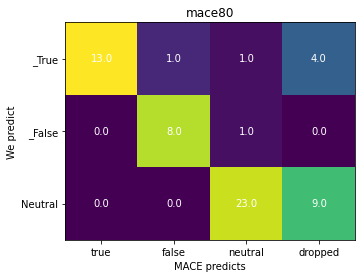

mace90 neutral Counter({'Neutral': 76, '_True': 5, '_False': 3})
mace90 false Counter({'_False': 21, '_True': 3})
mace90 true Counter({'_True': 31})
mace90 dropped Counter({'Neutral': 4})


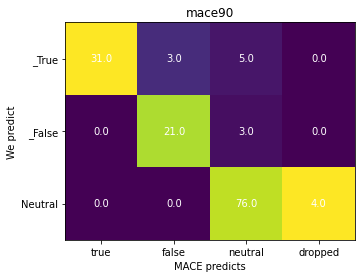

mace95 neutral Counter({'Neutral': 95, '_True': 3, '_False': 2})
mace95 false Counter({'_False': 24, '_True': 2, 'Neutral': 1})
mace95 dropped Counter({'Neutral': 6, '_False': 1})
mace95 true Counter({'_True': 35, 'Neutral': 4})


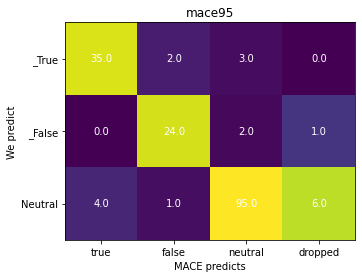

majority neutral Counter({'Neutral': 48, '_True': 2, '_False': 1})
majority false Counter({'_False': 10, 'Neutral': 1})
majority true Counter({'_True': 18, 'Neutral': 8})
majority dropped Counter({'Neutral': 1, '_False': 1})


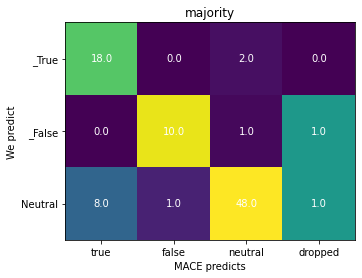

466


In [13]:
all_orig = ["true","false","neutral","dropped"]
all_actual = ["_True","_False","Neutral"]

# for system in confusion.keys():
#     for predicted_label in confusion[system].keys():
#         all_orig.add(predicted_label)
#         all_actual.update(confusion[system][predicted_label])

total = 0


for system in confusion.keys():
    matrix = np.zeros((len(all_actual),len(all_orig)))

    for predicted_label in confusion[system].keys():
        ctr = Counter(confusion[system][predicted_label])
        print(system,predicted_label,ctr)
        
        for k,v in ctr.items():
            matrix[all_actual.index(k)][all_orig.index(predicted_label)] +=v
            total += v
    
   
    
    cmatrix = matrix/matrix.sum(axis=0)
    fig, ax = plt.subplots()
    im = ax.imshow(cmatrix)
    plt.title(system)
    plt.xlabel("MACE predicts")
    plt.ylabel("We predict")
    
    
    for i in range(len(all_actual)):
        for j in range(len(all_orig)):
            text = ax.text(j, i, matrix[i, j], ha="center", va="center", color="w")
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(all_orig)))
    ax.set_yticks(np.arange(len(all_actual)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(all_orig)
    ax.set_yticklabels(all_actual)


    plt.show()
    
print(total)